In [58]:
!pip install missingno

In [59]:
from sklearn.preprocessing import LabelEncoder
import kagglehub
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# 0. Verisetini hazÄ±rlanmasÄ± ve notebook iÃ§ine eklenmesi

In [60]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
stealthtechnologies_predict_purity_and_price_of_honey_path = kagglehub.dataset_download('stealthtechnologies/predict-purity-and-price-of-honey')

print(stealthtechnologies_predict_purity_and_price_of_honey_path)
print('Data source import complete.')


/root/.cache/kagglehub/datasets/stealthtechnologies/predict-purity-and-price-of-honey/versions/2
Data source import complete.


In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk(stealthtechnologies_predict_purity_and_price_of_honey_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        path = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/root/.cache/kagglehub/datasets/stealthtechnologies/predict-purity-and-price-of-honey/versions/2/honey_purity_dataset.csv


In [62]:
honey_path = path

# 1. Verisetine genel bakÄ±ÅŸ

In [63]:
#NaN deÄŸerler bulunmayan orjinal datasetimize genel bir bakÄ±ÅŸ atÄ±yoruz.
honey_df = pd.read_csv(honey_path)
honey_df.head(3)

CS  Density     WC    pH    EC      F      G Pollen_analysis  Viscosity  \
0  2.81     1.75  23.04  6.29  0.76  39.02  33.63       Blueberry    4844.50   
1  9.47     1.82  17.50  7.20  0.71  38.15  34.41         Alfalfa    6689.02   
2  4.61     1.84  23.72  7.31  0.80  27.47  34.36        Chestnut    6883.60   

   Purity   Price  
0    0.68  645.24  
1    0.89  385.85  
2    0.66  639.64

In [64]:
#GÃ¶rÃ¼ldÃ¼ÄŸÃ¼ Ã¼zere Datasetimizde hiÃ§bir boÅŸ deÄŸer bulunmamakta.
honey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CS               247903 non-null  float64
 1   Density          247903 non-null  float64
 2   WC               247903 non-null  float64
 3   pH               247903 non-null  float64
 4   EC               247903 non-null  float64
 5   F                247903 non-null  float64
 6   G                247903 non-null  float64
 7   Pollen_analysis  247903 non-null  object 
 8   Viscosity        247903 non-null  float64
 9   Purity           247903 non-null  float64
 10  Price            247903 non-null  float64
dtypes: float64(10), object(1)
memory usage: 20.8+ MB


# 2. Datasetine rastgele eksik veriler eklemek.

In [65]:
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.

    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing
honey_df_missing = add_random_missing_values(dataframe = honey_df, missing_rate = 0.03)

In [66]:
#BoÅŸ deÄŸerler eklediÄŸim datasetime honey_df_missing ismini verdim, ÅŸimdi bu datasetini gÃ¶zlemleyeceÄŸiz.
honey_df_missing.shape

(247903, 11)

In [67]:
honey_df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CS               240449 non-null  float64
 1   Density          240710 non-null  float64
 2   WC               240544 non-null  float64
 3   pH               240557 non-null  float64
 4   EC               240636 non-null  float64
 5   F                240545 non-null  float64
 6   G                240583 non-null  float64
 7   Pollen_analysis  240616 non-null  object 
 8   Viscosity        240527 non-null  float64
 9   Purity           240656 non-null  float64
 10  Price            240486 non-null  float64
dtypes: float64(10), object(1)
memory usage: 20.8+ MB


In [68]:
honey_df_missing.dtypes

CS                 float64
Density            float64
WC                 float64
pH                 float64
EC                 float64
F                  float64
G                  float64
Pollen_analysis     object
Viscosity          float64
Purity             float64
Price              float64
dtype: object

In [69]:
#SÃ¼tunlarÄ±n istatistiksel verilerini gÃ¶zlemledim.
honey_df_missing.describe().T

count         mean          std      min      25%      50%  \
CS         240449.0     5.499986     2.594353     1.00     3.26     5.50   
Density    240710.0     1.535593     0.187797     1.21     1.37     1.54   
WC         240544.0    18.499586     3.748782    12.00    15.25    18.51   
pH         240557.0     4.996656     1.444042     2.50     3.75     4.99   
EC         240636.0     0.799973     0.057915     0.70     0.75     0.80   
F          240545.0    34.968472     8.655432    20.00    27.46    34.97   
G          240583.0    32.500816     7.226397    20.00    26.23    32.49   
Viscosity  240527.0  5753.825872  2455.821238  1500.05  3628.26  5755.59   
Purity     240656.0     0.824415     0.139430     0.61     0.66     0.82   
Price      240486.0   594.953476   233.498315   128.72   433.00   612.96   

               75%      max  
CS            7.74    10.00  
Density       1.70     1.86  
WC           21.75    25.00  
pH            6.25     7.50  
EC            0.85     0.90  
F            42.46    50.00  
G            38.76    45.00  
Viscosity  7888.23  9999.97  
Purity        0.97     1.00  
Price       770.22   976.69

* CS (Renk Skoru):
AralÄ±k: 1.0 - 10.0
Daha dÃ¼ÅŸÃ¼k deÄŸerler (1.0) aÃ§Ä±k renkli balÄ±, daha yÃ¼ksek deÄŸerler (10.0) koyu renkli balÄ± ifade ediyor. Ortalama 5.5, hem aÃ§Ä±k hem koyu renkli bal tÃ¼rlerinin karÄ±ÅŸÄ±k olduÄŸunu gÃ¶steriyor.

* Density (YoÄŸunluk): AralÄ±k: 1.21 - 1.86 g/cmÂ³ (25Â°C'de)
YoÄŸunluk, balÄ±n nem iÃ§eriÄŸi ve ÅŸeker konsantrasyonunu ifade eder. Daha yÃ¼ksek yoÄŸunluk, genelde daha az nem ve daha yÃ¼ksek kalite ile iliÅŸkilidir. Ortalama yoÄŸunluk 1.54, balÄ±n tipik yoÄŸunluk deÄŸerleri iÃ§inde, kabul edilebilir bir deÄŸerdir.

* WC (Su Ä°Ã§eriÄŸi): AralÄ±k: %12.0 - %25.0
Daha dÃ¼ÅŸÃ¼k su iÃ§eriÄŸi, daha uzun raf Ã¶mrÃ¼ ve daha yÃ¼ksek kalite anlamÄ±na gelir. YÃ¼ksek su iÃ§eriÄŸi fermente olma riskini arttÄ±rabilir. Ortalama su iÃ§eriÄŸi %18.5 bu da kabul edilebilir sÄ±nÄ±rlar iÃ§inde yer alÄ±yor.

* pH: AralÄ±k: 2.50 - 7.50
DÃ¼ÅŸÃ¼k pH, balÄ±n antibakteriyel Ã¶zelliklerini artÄ±rÄ±r. Daha yÃ¼ksek pH, katkÄ± maddeleri veya iÅŸlenme sÃ¼recine iÅŸaret edebilir. Ortalama pH deÄŸeri 4.99, doÄŸal bal iÃ§in tipik bir deÄŸerdir.

* EC (Elektriksel Ä°letkenlik): AralÄ±k: 0.7 - 0.9 milliSiemens/cm
Daha yÃ¼ksek iletkenlik, genelde mineraller aÃ§Ä±sÄ±ndan zengin koyu bal tÃ¼rlerini (Ã¶rneÄŸin, manuka veya buckwheat (karabuÄŸday)) temsil eder. Ortalama iletkenlik 0.80, saf bal iÃ§in tipik bir deÄŸer. Dar daÄŸÄ±lÄ±m, verilerin birbirine yakÄ±n olduÄŸunu gÃ¶steriyor.

* F (Fruktoz) ve G (Glukoz): F AralÄ±k: 20 - 50 | G AralÄ±k: 20 - 45
Fruktoz tatlÄ±lÄ±k verirken glukoz kristalleÅŸmeyi etkiler. Dengeli bir oran, iyi tat ve uzun raf Ã¶mrÃ¼ saÄŸlar. Fruktoz ortalamasÄ± 34.96, Glukoz ortalamasÄ± 32.49, dengeli bir ÅŸeker oranÄ±na iÅŸaret ediyor.

* Pollen_analysis (Polen KaynaÄŸÄ±):
Kategoriler: 18 farklÄ± Ã§iÃ§ek kaynaÄŸÄ± (Ã¶rneÄŸin, Manuka, Lavanta, AyÃ§iÃ§eÄŸi).
Ã‡iÃ§ek kaynaÄŸÄ± balÄ±n tadÄ±nÄ±, rengini ve fiyatÄ±nÄ± etkiler.

* Viscosity (Viskozite): AralÄ±k: 1500 - 10000 centipoise Optimal AralÄ±k: 2500 - 9500
Daha yÃ¼ksek viskozite, saf ve iÅŸlenmemiÅŸ balÄ±n gÃ¶stergesidir. AÅŸÄ±rÄ± dÃ¼ÅŸÃ¼k viskozite iÅŸlenmiÅŸ veya katkÄ± maddesi iÃ§eren balÄ± ifade edebilir.
Ortalama saflÄ±k deÄŸeri 0.82, bu da veri setindeki bal Ã¶rneklerinin Ã§oÄŸunun saf olduÄŸunu gÃ¶steriyor.

* Purity (SaflÄ±k): AralÄ±k: 0.01 - 1.00
YÃ¼ksek deÄŸerler (%100'e yakÄ±n) saf balÄ± ifade eder.
Ortalama saflÄ±k deÄŸeri 0.82, bu da veri setindeki bal Ã¶rneklerinin Ã§oÄŸunun saf olduÄŸunu gÃ¶steriyor. Alt aralÄ±kta birkaÃ§ impÃ¼re bal bulunabilir.

* Price (Fiyat): AralÄ±k: 128.72 - 976.69
Fiyat, saflÄ±k, Ã§iÃ§ek kaynaÄŸÄ±, viskozite gibi faktÃ¶rlerden etkilenir.
Ortalama fiyat 594.93, hem yÃ¼ksek kaliteli hem de daha uygun fiyatlÄ± bal Ã§eÅŸitlerini kapsÄ±yor.




# 3. Eksik Veri Analizi

In [70]:
#Bu eksik deÄŸerlerin kategori bazÄ±nda daÄŸÄ±lÄ±mÄ±nÄ± gÃ¶rÃ¼yoruz.
honey_df_missing.isna().sum()

CS                 7454
Density            7193
WC                 7359
pH                 7346
EC                 7267
F                  7358
G                  7320
Pollen_analysis    7287
Viscosity          7376
Purity             7247
Price              7417
dtype: int64

In [71]:
# Toplam kayÄ±t sayÄ±sÄ±
total_rows = len(honey_df_missing)

# Eksik deÄŸerlerin sayÄ±sÄ±nÄ± ve oranÄ±nÄ± hesaplama
missing_counts = honey_df_missing.isna().sum()  # Eksik deÄŸerlerin sayÄ±sÄ±
missing_percentage = (missing_counts / total_rows) * 100  # OranÄ± yÃ¼zdeye Ã§evir

# Eksik deÄŸer oranÄ±nÄ± yazdÄ±rma
print("Eksik DeÄŸer SayÄ±sÄ±:")
print(missing_counts)
print("\nEksik DeÄŸer YÃ¼zdesi (%):")
print(missing_percentage)

Eksik DeÄŸer SayÄ±sÄ±:
CS                 7454
Density            7193
WC                 7359
pH                 7346
EC                 7267
F                  7358
G                  7320
Pollen_analysis    7287
Viscosity          7376
Purity             7247
Price              7417
dtype: int64

Eksik DeÄŸer YÃ¼zdesi (%):
CS                 3.006821
Density            2.901538
WC                 2.968500
pH                 2.963256
EC                 2.931388
F                  2.968096
G                  2.952768
Pollen_analysis    2.939456
Viscosity          2.975357
Purity             2.923321
Price              2.991896
dtype: float64


In [72]:
#Datasetimizin iÃ§inde ÅŸu andan itibaren 80669 adet kayÄ±p deÄŸer bulunuyor.
honey_df_missing.isna().sum().sum()

80624

In [73]:
#Burada eksik olmayann deÄŸerlerimi gÃ¶rÃ¼yorum.
honey_df_missing.notnull().sum()

CS                 240449
Density            240710
WC                 240544
pH                 240557
EC                 240636
F                  240545
G                  240583
Pollen_analysis    240616
Viscosity          240527
Purity             240656
Price              240486
dtype: int64

In [74]:
print(f"Veri seti iÃ§erisinde toplam {honey_df_missing.notnull().sum().sum()} adet eksik olmayan, {honey_df_missing.isnull().sum().sum()} eksik gÃ¶zlem var.")

Veri seti iÃ§erisinde toplam 2646309 adet eksik olmayan, 80624 eksik gÃ¶zlem var.


In [75]:
#BÃ¼tÃ¼n boÅŸ deÄŸerleri olan satÄ±rlarÄ± gÃ¶rÃ¼yorum burada.
honey_df_missing[honey_df_missing.isnull().any(axis = 1)]


CS  Density     WC    pH    EC      F      G Pollen_analysis  \
0       2.81     1.75  23.04   NaN  0.76  39.02  33.63       Blueberry   
6       7.15      NaN  13.37  5.79  0.89  43.38  44.94       Sunflower   
8       4.98     1.73  16.60   NaN  0.74  22.49  44.74  Orange Blossom   
12      8.19      NaN    NaN  2.92  0.82  27.09  31.10          Clover   
13      7.78     1.49  12.64  3.99  0.81  36.67  33.41             NaN   
...      ...      ...    ...   ...   ...    ...    ...             ...   
247888   NaN     1.48  23.47  5.08  0.83  42.65  29.90        Chestnut   
247894  6.52     1.55  23.01  3.35  0.84  47.87  30.24         Avocado   
247895  4.32     1.77  20.78  6.41  0.89  20.82  22.39             NaN   
247898  1.98     1.29  17.90  4.82  0.89  36.10  34.69        Rosemary   
247900  7.78     1.49  15.78  5.69  0.73  44.60  44.07             NaN   

        Viscosity  Purity   Price  
0         4844.50    0.68     NaN  
6         7384.93    0.95  838.98  
8         8800.10    0.95  238.05  
12        4106.97    0.66  139.71  
13        7416.55    0.84  364.20  
...           ...     ...     ...  
247888    7181.86    0.66  639.64  
247894    8074.58     NaN  976.69  
247895    3418.88    0.64  204.93  
247898        NaN    1.00  754.98  
247900    4139.79    0.64  615.46  

[69676 rows x 11 columns]

In [76]:
#Burada da boÅŸ deÄŸerleri olan ilk 5 satÄ±rÄ± gÃ¶rÃ¼yorum.
honey_df_missing[honey_df_missing.notnull().all(axis = 1)][:5]


CS  Density     WC    pH    EC      F      G Pollen_analysis  Viscosity  \
1  9.47     1.82  17.50  7.20  0.71  38.15  34.41         Alfalfa    6689.02   
2  4.61     1.84  23.72  7.31  0.80  27.47  34.36        Chestnut    6883.60   
3  1.77     1.40  16.61  4.01  0.78  31.52  28.15       Blueberry    7167.56   
4  6.11     1.25  19.63  4.82  0.90  29.65  42.52         Alfalfa    5125.44   
5  2.17     1.35  20.67  4.11  0.75  27.19  43.54          Borage    3967.30   

   Purity   Price  
1    0.89  385.85  
2    0.66  639.64  
3    1.00  946.46  
4    1.00  432.62  
5    0.80  593.55

In [77]:
# Matrix visualization, eksik verilerin nerelerde olduÄŸunu gÃ¶rmek iÃ§in kullandÄ±m.
msno.matrix(honey_df_missing, figsize=(8, 4), fontsize=10)
plt.show()


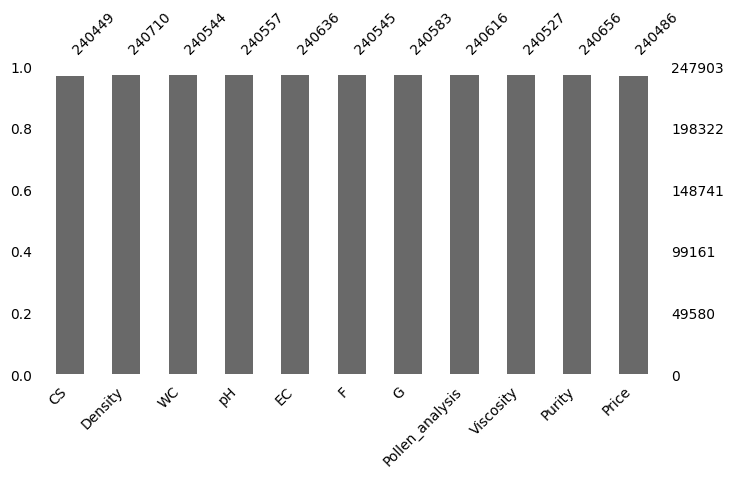

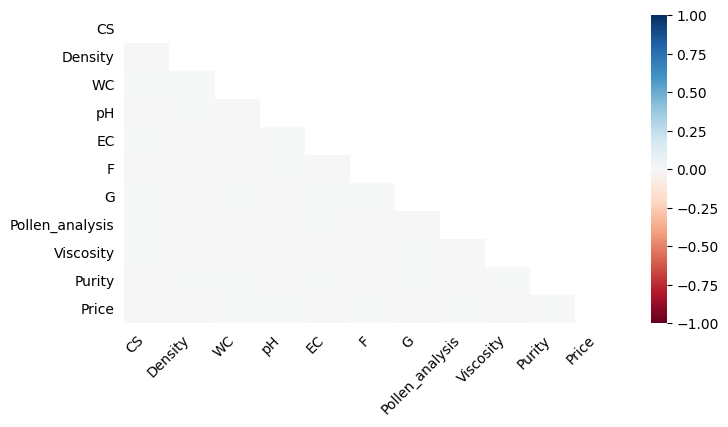

In [78]:
# Bar chart of missing data
msno.bar(honey_df_missing, figsize=(8, 4), fontsize=10)
plt.show()

# Heatmap to show correlation of missing data
msno.heatmap(honey_df_missing, figsize=(8, 4), fontsize=10)
plt.show()


In [79]:
# "Pollen_analysis" kolonunu almÄ±yorum kategorik olduÄŸu iÃ§in
plot_honey_df = honey_df_missing.drop(columns=["Pollen_analysis"])

columns = plot_honey_df.columns  # bÃ¼tÃ¼n kolon isimlerini almak iÃ§in

# Subplot yaratmak iÃ§in
fig, axes = plt.subplots(5, 2, figsize=(15, 20))  # 5 rows, 2 columns (adjust grid as needed)

# Kolay dahil etmek iÃ§in flatlÄ±yorum axesleri
axes = axes.flatten()

# Bir sonraki grafiÄŸi yaratmak iÃ§in loopa sokuyorum
for i, col in enumerate(columns):
      plot_honey_df[col].plot(
          kind='hist',
          edgecolor='black',
          ax=axes[i],
          title=col)

# KullanÄ±lmayan axeslar varsa silmek iÃ§in
for j in range(len(columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


DeÄŸerlerimin fazla dalgalanma olmadan, minik farklÄ±lÄ±klarla dÃ¼zgÃ¼n bir ÅŸekilde daÄŸÄ±lÄ±p daÄŸÄ±lmadÄ±ÄŸÄ±nÄ± gÃ¶rmek iÃ§in oluÅŸturduÄŸum bu grafiklerin sonucunda da ortalama deÄŸerler alarak eksik verilerimi doldurmanÄ±n daha verimli bir sonuca ulaÅŸtÄ±racaÄŸÄ±nÄ± gÃ¶rmÃ¼ÅŸ oldum.

# 3.2 Eksik verilerin doldurulmasÄ±

Eksik verilerin doldurulmasÄ± iÃ§in ortalama seÃ§eneÄŸini tercih ettim Ã§Ã¼nkÃ¼ genel olarak deÄŸerlerde dalgalanma gÃ¶zlemlenmiyor.

 Kategorik olan sÃ¼tunumu da mod ile doldurdum.

In [80]:
# Ortalama ile doldurmak iÃ§in veri setinin kopyasÄ±nÄ± alÄ±yoruz
mean_filled_df = honey_df_missing.copy()

# Sadece sayÄ±sal sÃ¼tunlarÄ± seÃ§
numeric_columns = mean_filled_df.select_dtypes(include=['number']).columns

# Eksik deÄŸerleri sÃ¼tunlarÄ±n ortalamalarÄ± ile dolduruyoruz, sadece sayÄ±sal sÃ¼tunlar iÃ§in
mean_filled_df[numeric_columns] = mean_filled_df[numeric_columns].fillna(mean_filled_df[numeric_columns].mean())

# Mod ile doldurma
categorical_column = "Pollen_analysis"
mean_filled_df[categorical_column] = mean_filled_df[categorical_column].fillna(mean_filled_df[categorical_column].mode()[0])

# Matrix visualization
msno.matrix(mean_filled_df, figsize=(8, 4), fontsize=10, color=[0.2, 0.2, 0.6])
plt.show()

Matrix'te de gÃ¶rdÃ¼lÃ¼ÄŸÃ¼ Ã¼zere boÅŸ deÄŸerler gÃ¶rÃ¼nmÃ¼yor ama bir de sayÄ±sal olarak kontrol edelim.

In [81]:
#Ortalama deÄŸer ile doldurduÄŸum deÄŸerlerimi bir de sayÄ±sal olarak kontrol ediyorum.
mean_filled_df.isna().sum()

CS                 0
Density            0
WC                 0
pH                 0
EC                 0
F                  0
G                  0
Pollen_analysis    0
Viscosity          0
Purity             0
Price              0
dtype: int64

# 4.  Exploratory Data Analysis (EDA)

In [82]:
# Fiyat deÄŸiÅŸkeni iÃ§in Histogram grafiÄŸi
plt.figure(figsize=(10, 6))
plt.hist(mean_filled_df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Fiyat DaÄŸÄ±lÄ±mÄ±')
plt.xlabel('Fiyat')
plt.ylabel('SÄ±klÄ±k')
plt.show()

Genel olarak ilk bakmak istediÄŸim grafik Price(Fiyat) kategorisinin genel olarak daÄŸÄ±lÄ±mÄ±nÄ±, sÄ±klÄ±ÄŸÄ±nÄ± iÃ§eren grafik oldu. Grafik yorumlanacak olursa, basit olarak ortalama olarak 600 birimlik fiyata sahip Ã¼rÃ¼nlerde bir yÄ±ÄŸÄ±lma mevcuttur. 600-1000 aralÄ±ÄŸÄ±ndaki Ã¼rÃ¼n sayÄ±sÄ±nÄ±n da genel olarak fazla olduÄŸu gÃ¶zlemleniyor. BallarÄ±n Ã§oÄŸunlukla pahalÄ± olduÄŸunu sÃ¶yleyebiliriz, bu yorum gelecekte daha detaylÄ± olarak saflÄ±k, viskozite ve polen sÄ±nÄ±fÄ± olarak ayrÄ±larak incelenecektir.

<ipython-input-83-9b1e1357136a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


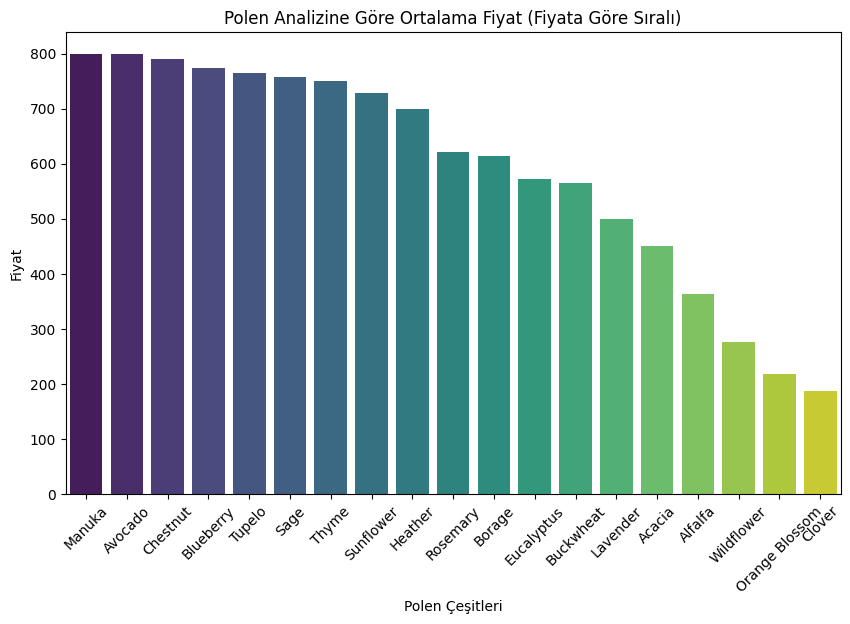

In [83]:
# Ortalama Price deÄŸerlerini kategorilere gÃ¶re hesapla ve sÄ±ralÄ± hale getir
data = mean_filled_df
avg_price_per_category = data.groupby('Pollen_analysis')['Price'].mean().reset_index()
avg_price_per_category = avg_price_per_category.sort_values(by='Price', ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Pollen_analysis',
    y='Price',
    data=avg_price_per_category,
    palette='viridis',
    order=avg_price_per_category['Pollen_analysis']
)
plt.title('Polen Analizine GÃ¶re Ortalama Fiyat (Fiyata GÃ¶re SÄ±ralÄ±)' )
plt.xticks(rotation=45)
plt.xlabel('Polen Ã‡eÅŸitleri')
plt.ylabel('Fiyat')
plt.show()

Fiyat ve Polen tÃ¼rleri arasÄ±ndaki iliÅŸkiyi incelersek, 18 tÃ¼rden 9 tanesinin 700 birimden fazla fiyata sahip olduÄŸunu gÃ¶rÃ¼rÃ¼z. En yÃ¼ksek fiyatlÄ± polen ise Manuka polenidir. Ortalama fiyat olan 400'Ã¼n altÄ±nda 4 polen tÃ¼rÃ¼ bulunuyor bunlar Alfafa, Wildflower, Orange Blossom ve Clover'dÄ±r.

<ipython-input-84-38c92eb9364f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Pollen_analysis', x='Purity', data=avg_purity_per_pollen, palette= "mako")


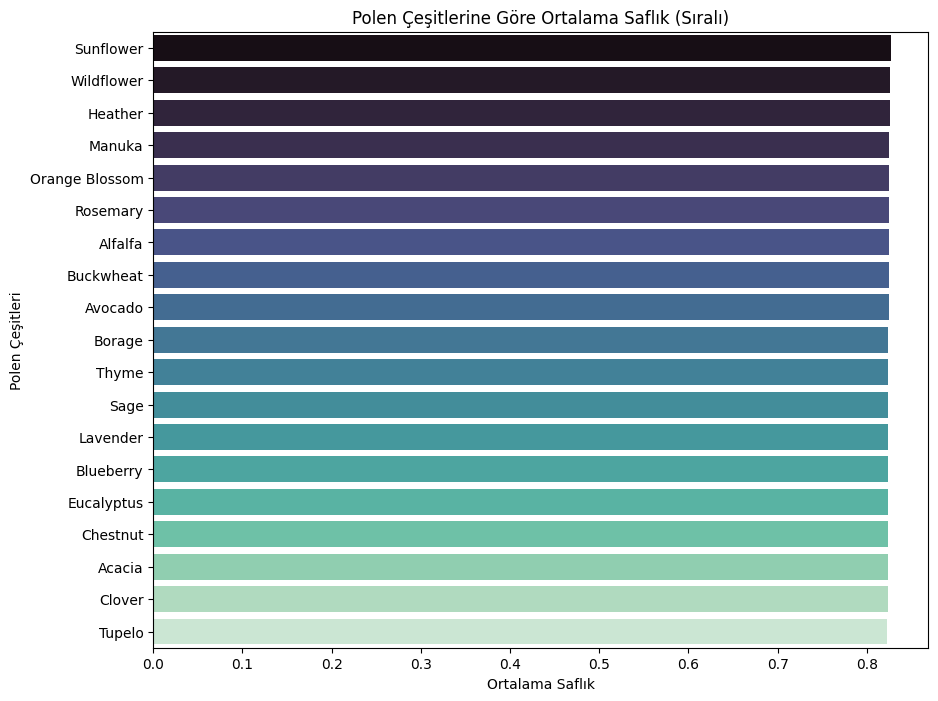

In [84]:
# Yatay bar plot
avg_purity_per_pollen = data.groupby('Pollen_analysis')['Purity'].mean().reset_index()
avg_purity_per_pollen = avg_purity_per_pollen.sort_values(by='Purity', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(y='Pollen_analysis', x='Purity', data=avg_purity_per_pollen, palette= "mako")
plt.title('Polen Ã‡eÅŸitlerine GÃ¶re Ortalama SaflÄ±k (SÄ±ralÄ±)')
plt.ylabel('Polen Ã‡eÅŸitleri')
plt.xlabel('Ortalama SaflÄ±k')
plt.show()

Genel olarak SaflÄ±k ve Polen tÃ¼rleri arasÄ±ndaki iliÅŸkiyi inceleyecek olursak bÃ¼tÃ¼n deÄŸerlerin birbirine fazlasÄ±yla yakÄ±n olduÄŸu gÃ¶rÃ¼lÃ¼r ve  detaylÄ± bir aÃ§Ä±klama yapmak iÃ§in bu grafiÄŸin daha dar bir aralÄ±ÄŸa sahip halini aÅŸaÄŸÄ±da inceleyeceÄŸim.

<ipython-input-85-2ac5abc34e02>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pollen_analysis', y='Purity', data=avg_purity_per_pollen, palette="rocket")


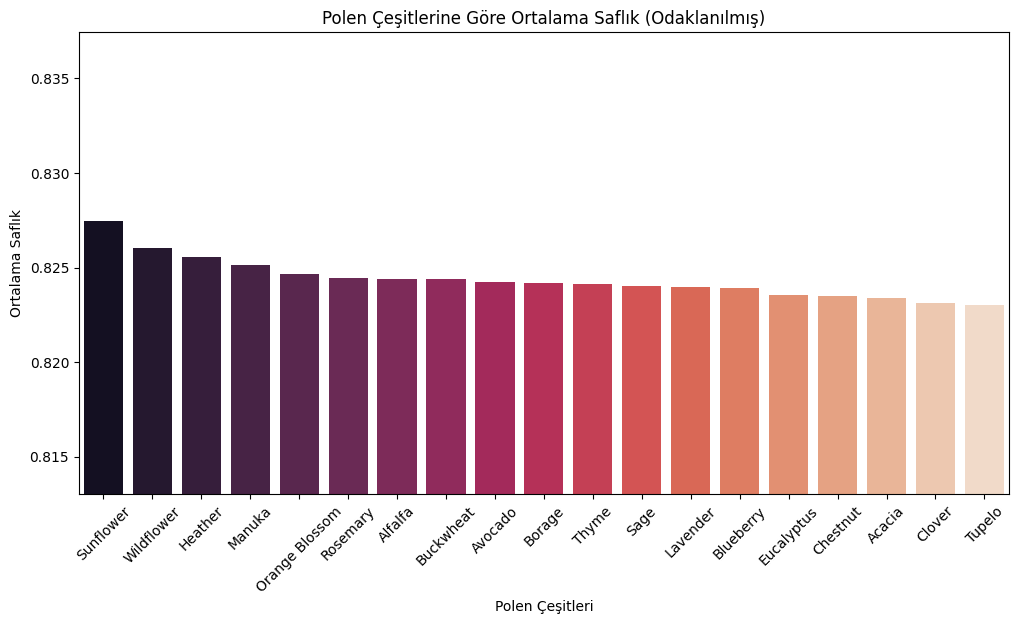

In [85]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Pollen_analysis', y='Purity', data=avg_purity_per_pollen, palette="rocket")

# Y eksenini odaklamak iÃ§in sÄ±nÄ±rlarÄ± daraltma
plt.ylim(avg_purity_per_pollen['Purity'].min() - 0.01, avg_purity_per_pollen['Purity'].max() + 0.01)

plt.title('Polen Ã‡eÅŸitlerine GÃ¶re Ortalama SaflÄ±k (OdaklanÄ±lmÄ±ÅŸ)')
plt.xlabel('Polen Ã‡eÅŸitleri')
plt.ylabel('Ortalama SaflÄ±k')
plt.xticks(rotation=45)
plt.show()

DeÄŸerleri daha detaylÄ± gÃ¶rebildiÄŸimiz bu grafikte "Sunflower", "Heather", "Wildflower" polenlerinden elde edilen balÄ±n saflÄ±ÄŸÄ±nÄ±n diÄŸer ballara gÃ¶re daha fazla olduÄŸu gÃ¶rÃ¼lebilir ama baÅŸta da belirttiÄŸim gibi deÄŸerler arasÄ±nda bÃ¼yÃ¼k bir fark bulunmamakta.

In [86]:
#Histogram
plt.figure(figsize=(20, 20))
ind=1
columns = mean_filled_df.columns
for  variable in (columns):
    plt.subplot(4,3, ind)
    sns.histplot(x=mean_filled_df[variable],kde=True,color="green")
    plt.title(variable)
    ind+=1
    plt.xlabel('')
plt.show()

  * CS, Density, WC, pH, EC, G, F, Pollen_analysis, Viscosity gibi Ã¶zelliklerin histogramlarÄ±nda dikkat Ã§ekici bir ÅŸekilde simetrik ve merkezi bir yoÄŸunlaÅŸma var. Bu durum, bu Ã¶zelliklerin normal daÄŸÄ±lÄ±ma yakÄ±n olabileceÄŸini gÃ¶sterebilir.

  * Purity: Bu deÄŸiÅŸken daha farklÄ± bir daÄŸÄ±lÄ±ma sahip ve veriler belirli deÄŸerlerde yoÄŸunlaÅŸmÄ±ÅŸ. 0.65, 0.82, 1.00 deÄŸerlerinde 3 farklÄ± peak noktasÄ± vardÄ±r. Genel olarak verinin iÃ§inde 3 ayrÄ± saflÄ±k derecesinde bal bulunduÄŸu sÃ¶ylenebilir.
  
  * Price: Fiyat deÄŸiÅŸkeninde yÃ¼ksek varyans gÃ¶zlemleniyor. DaÄŸÄ±lÄ±m, birkaÃ§ belirli deÄŸer olan 600 civarÄ±na yoÄŸunlaÅŸmÄ±ÅŸ ve diÄŸer alanlarda daha dÃ¼ÅŸÃ¼k yoÄŸunluk gÃ¶steriyor.

In [87]:
# Grafik boyutu
plt.figure(figsize=(20, 10))

# Boxplot iÃ§in renk paleti belirleme
boxplot = sns.boxplot(data=mean_filled_df, x='Pollen_analysis', y='Price', palette='Set3')

# Her polen tÃ¼rÃ¼ iÃ§in minimum ve maksimum deÄŸerleri hesaplayÄ±p ekleme
for i, pollen in enumerate(mean_filled_df['Pollen_analysis'].unique()):
    subset = mean_filled_df[mean_filled_df['Pollen_analysis'] == pollen]
    minimum = subset['Price'].min()
    maximum = subset['Price'].max()

    # Minimum ve maksimumu ekleme
    boxplot.text(i, minimum - 20, f'Min: {minimum:.0f}', color='blue', ha='center', fontsize=9)
    boxplot.text(i, maximum + 20, f'Max: {maximum:.0f}', color='green', ha='center', fontsize=9)

# Y ekseni aralÄ±ÄŸÄ±nÄ± daraltma (Ã¶rnek olarak fiyat 100 ile 1000 arasÄ±nda)
plt.ylim(100, 1000)

plt.title('Polen Ã‡eÅŸitlerine GÃ¶re Fiyat (Boxplot GrafiÄŸi)', fontsize=16)
plt.xlabel('Polen Ã‡eÅŸitleri', fontsize=14)
plt.ylabel('Fiyat', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Daha iyi gÃ¶rÃ¼nÃ¼rlÃ¼k iÃ§in yatay Ã§izgiler
plt.show()

<ipython-input-87-17050ec2dac2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(data=mean_filled_df, x='Pollen_analysis', y='Price', palette='Set3')


* Fiyat AralÄ±klarÄ±: Her bir polen tÃ¼rÃ¼ iÃ§in fiyatlar arasÄ±nda Ã¶nemli farklÄ±lÄ±klar bulunmaktadÄ±r.
BazÄ± polen tÃ¼rleri dar bir fiyat aralÄ±ÄŸÄ±na sÄ±kÄ±ÅŸÄ±rken (Ã¶r. Clover, Orange Blossom), diÄŸerlerinde geniÅŸ bir daÄŸÄ±lÄ±m vardÄ±r (Ã¶r. Eucalyptus, Heather).

* Outlier (AykÄ±rÄ± DeÄŸerler): Kutu grafiklerinde birkaÃ§ polen tÃ¼rÃ¼nde fiyat aralÄ±klarÄ±nÄ±n dÄ±ÅŸÄ±nda kalan deÄŸerler gÃ¶zlemlenmektedir (Ã¶r. Orange Blossom, Wildflower, Clover ). Bu durum, pazardaki nadir ya da olaÄŸan dÄ±ÅŸÄ± fiyatlarÄ± gÃ¶sterebilir.

* Genel Fiyat Trendleri: Premium olarak bilinen polen tÃ¼rleri (Ã¶r. Manuka, Heather, Avocado) genel olarak daha yÃ¼ksek fiyat segmentlerinde konumlanmÄ±ÅŸtÄ±r.
Daha dÃ¼ÅŸÃ¼k fiyatlÄ± polen tÃ¼rleri arasÄ±nda Clover, Orange Blossom, ve Wildflower bulunmaktadÄ±r.

* Pazar Segmentasyonu: Bu grafik, her polen tÃ¼rÃ¼nÃ¼n farklÄ± bir fiyat segmentine hitap ettiÄŸini gÃ¶stermektedir. Ã–rneÄŸin:


  Premium Segment: Manuka, Heather, Avocado.

  Orta Segment: Eucalyptus, Blueberry.

  DÃ¼ÅŸÃ¼k Segment: Orange Blossom, Wildflower.


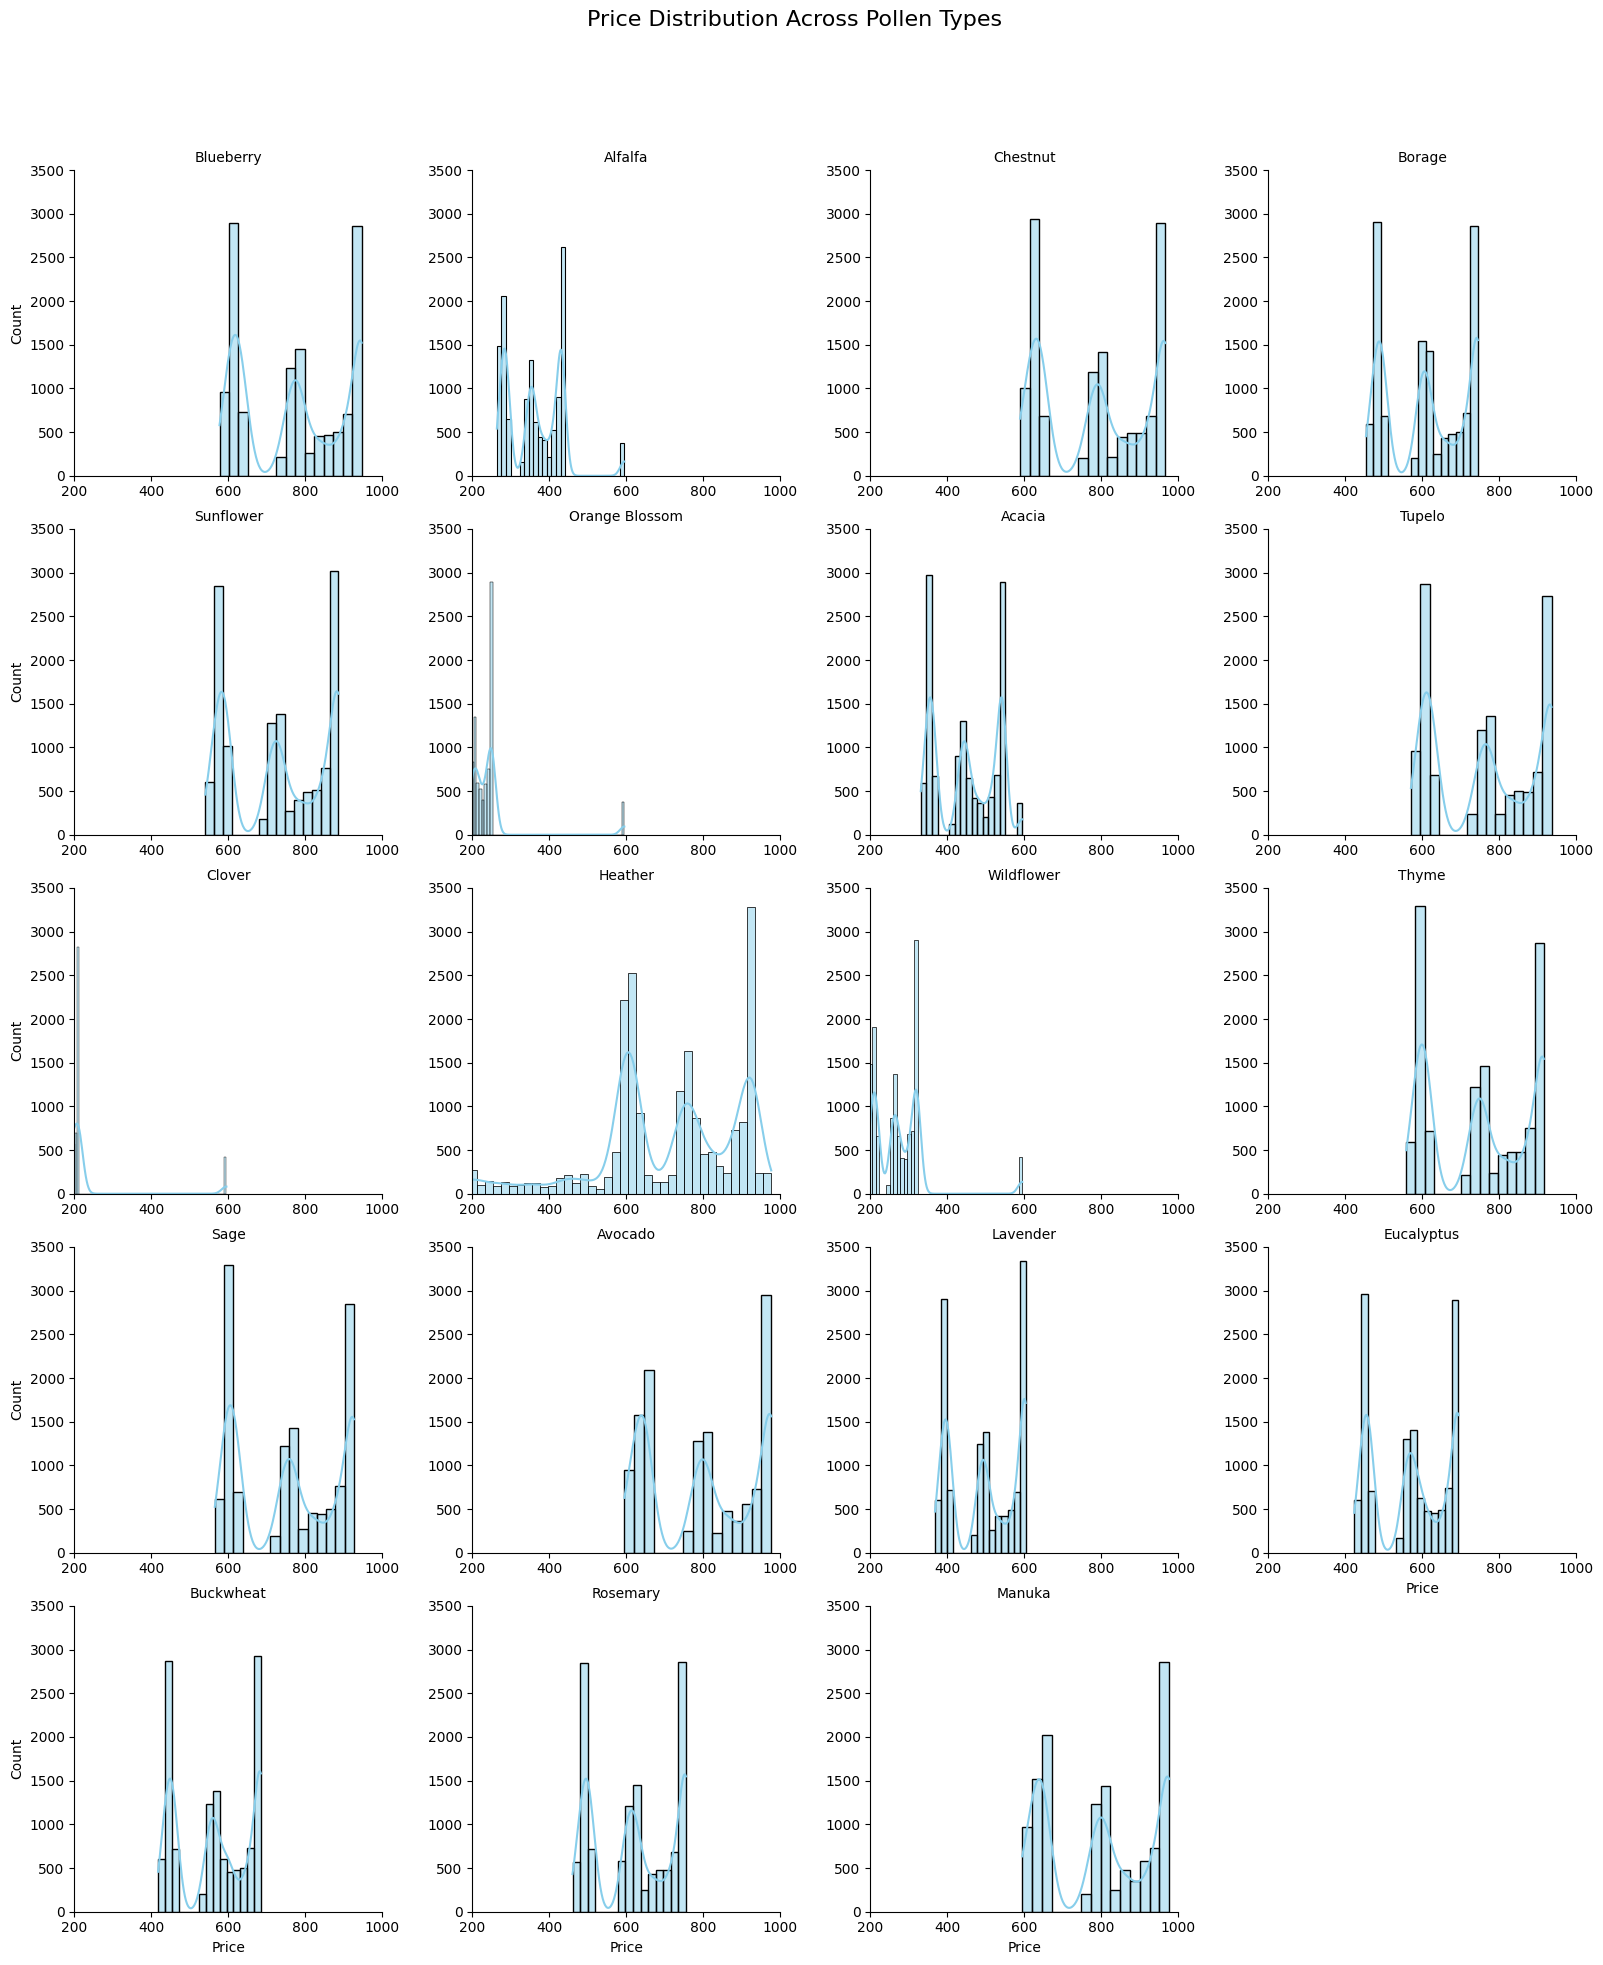

In [88]:
# Polen tÃ¼rlerine gÃ¶re fiyat daÄŸÄ±lÄ±mÄ± iÃ§in FacetGrid
g = sns.FacetGrid(data, col='Pollen_analysis', col_wrap=4, height=4, sharex=False, sharey=False)  # Disable shared axes
g.map(sns.histplot, 'Price', kde=True, color='skyblue')

# Her alt grafikte x ve y ekseni sÄ±nÄ±rlarÄ±nÄ± ve aralÄ±klarÄ±nÄ± ayarlamak
for ax in g.axes.flat:
    ax.set_xlim(200, 1000)  # X-axis limits
    ax.set_ylim(0, 3500)    # Y-axis limits
    ax.set_xticks(range(200, 1100, 200))  # X-axis ticks
    ax.set_yticks(range(0, 4000, 500))   # Y-axis ticks

# BaÅŸlÄ±klar ve genel gÃ¶rÃ¼nÃ¼m ayarlarÄ±
g.set_titles('{col_name}')
plt.subplots_adjust(top=0.9)  # Adjust spacing for the title
g.fig.suptitle('Price Distribution Across Pollen Types', fontsize=16)

# Genel eksen etiketleri
g.set_axis_labels("Price", "Count")

plt.show()

* Blueberry: Fiyatlar 600-1000 aralÄ±ÄŸÄ±nda yoÄŸunlaÅŸmÄ±ÅŸtÄ±r, ~600 ve ~900 civarÄ±nda iki tepe noktasÄ± bulunmaktadÄ±r.

* Alfalfa: Fiyatlar 200-600 arasÄ±nda yoÄŸunlaÅŸmÄ±ÅŸtÄ±r, ~400 civarÄ±nda tek bir tepe noktasÄ± bulunmaktadÄ±r.

* Chestnut: Fiyatlar 600-1000 arasÄ±nda yayÄ±lmÄ±ÅŸtÄ±r, ~600 ve ~900 civarÄ±nda iki tepe noktasÄ± bulunmaktadÄ±r. Bu durum, orta fiyatlÄ± ve premium segmenti iÅŸaret ediyor olabilir.

* Borage: Fiyatlar 400-800 arasÄ±nda yoÄŸunlaÅŸmÄ±ÅŸtÄ±r, ~450 ve ~700 civarÄ±nda iki tepe noktasÄ± bulunmaktadÄ±r.

* Sunflower: Fiyatlar 600-1000 arasÄ±nda yoÄŸunlaÅŸmÄ±ÅŸ, ~600 ve ~900 civarÄ±nda iki belirgin tepe noktasÄ± bulunmaktadÄ±r. Bu durum, orta fiyatlÄ± ve premium segmenti iÅŸaret ediyor olabilir.

* Orange Blossom: Fiyatlar 200-300 aralÄ±ÄŸÄ±nda yoÄŸunlaÅŸmÄ±ÅŸtÄ±r, ~250 civarÄ±nda tek bir tepe noktasÄ± bulunmaktadÄ±r.

* Acacia: Fiyatlar 400-600 arasÄ±nda yoÄŸunlaÅŸmÄ±ÅŸtÄ±r, ~450 ve ~550 civarÄ±nda iki tepe noktasÄ± bulunmaktadÄ±r.

* Tupelo: Fiyatlar 600-1000 arasÄ±nda yoÄŸunlaÅŸmÄ±ÅŸtÄ±r, ~600 ve ~900 civarÄ±nda iki tepe noktasÄ± bulunmaktadÄ±r. Bu durum, orta fiyatlÄ± ve premium segmenti iÅŸaret ediyor olabilir.

* Avocado: Fiyatlar 600-1000 aralÄ±ÄŸÄ±nda yoÄŸunlaÅŸmÄ±ÅŸ, ~700 ve ~900 civarÄ±nda iki tepe noktasÄ± bulunmaktadÄ±r. Bu durum, orta fiyatlÄ± ve premium segmenti iÅŸaret ediyor olabilir.

* Lavender: Fiyatlar 400-600 aralÄ±ÄŸÄ±nda yoÄŸunlaÅŸmÄ±ÅŸ, ~450 ve ~550 civarÄ±nda iki tepe noktasÄ± bulunmaktadÄ±r.

* Eucalyptus: Fiyatlar 200-800 arasÄ±nda geniÅŸ bir daÄŸÄ±lÄ±ma sahiptir ve ~400 ile ~600 civarÄ±nda iki tepe noktasÄ± bulunmaktadÄ±r.

* Buckwheat: Fiyatlar 400-600 aralÄ±ÄŸÄ±nda yoÄŸunlaÅŸmÄ±ÅŸ, ~450 ve ~550 civarÄ±nda iki tepe noktasÄ± bulunmaktadÄ±r.

* Rosemary: Fiyatlar 400-800 arasÄ±nda yoÄŸunlaÅŸmÄ±ÅŸ, ~500 ve ~700 civarÄ±nda iki belirgin tepe noktasÄ± bulunmaktadÄ±r.

* Heather: Fiyatlar 600-1000 arasÄ±nda yoÄŸunlaÅŸmÄ±ÅŸ, ~600 ve ~900 civarÄ±nda iki belirgin tepe noktasÄ± bulunmaktadÄ±r.Bu durum, orta fiyatlÄ± ve premium segmenti iÅŸaret ediyor olabilir.

* Manuka: Fiyatlar 600-1000 aralÄ±ÄŸÄ±nda yoÄŸunlaÅŸmÄ±ÅŸ, ~700 ve ~900 civarÄ±nda iki tepe noktasÄ± bulunmaktadÄ±r. Bu durum, orta fiyatlÄ± ve premium segmenti iÅŸaret ediyor olabilir.

-


* Ã–ne Ã‡Ä±kan Bulgular:

Orange Blossom, Wildflower ve Clover polenleri tek tepe noktalÄ± yapÄ±sÄ±na sahip olduÄŸu iÃ§in diÄŸerlerinden ayrÄ±lan bir yapÄ±ya sahiptir.

Manuka, Heather, Avocado polenlerinden Ã¼retilen ballar genel olarak daha pahalÄ± olma eÄŸilimdedir.

Eucalyptus, fiyat deÄŸiÅŸkenliÄŸinin en yÃ¼ksek olduÄŸu tÃ¼rdÃ¼r ve Ã§ok farklÄ± kalite seviyelerine veya farklÄ± segmentlere iÅŸaret ediyor.

Genel olarak Ã§oÄŸu polen tÃ¼rÃ¼ (~600 ve ~900) fiyat aralÄ±ÄŸÄ±nda yoÄŸunlaÅŸarak iki ayrÄ± tepe noktasÄ± oluÅŸturur. Bu durum, farklÄ± kalite seviyelerini veya farklÄ± segmentleri iÅŸaret ediyor olabilir.

In [89]:
#Scatter plot
plt.figure(figsize=(22, 12))
ind=1
for variable in (['CS', 'Density', 'WC', 'pH', 'EC', 'F', 'G', 'Viscosity','Price']):
    plt.subplot(3,3, ind)
    plt.scatter(mean_filled_df[variable],mean_filled_df["Purity"],color="blue")
    plt.title(f"Purity vs {variable}")
    ind+=1
    plt.xlabel(variable)
    plt.ylabel("Purity")
plt.tight_layout()
plt.show()

* Purity vs CS (Color Score):
Purity genelde sabit deÄŸerlerde (Ã¶rneÄŸin, 0.80, 0.90 ve 1.00) yoÄŸunlaÅŸmÄ±ÅŸtÄ±r.
DÃ¼ÅŸÃ¼k CS (1-5) deÄŸerlerinde Purity daha geniÅŸ bir daÄŸÄ±lÄ±m gÃ¶sterirken, yÃ¼ksek CS deÄŸerlerinde (~7-10) 0.80 ile 1.00 arasÄ±nda yoÄŸunlaÅŸma gÃ¶rÃ¼lmektedir. Color Score, Purity Ã¼zerinde doÄŸrudan bir deÄŸiÅŸim yaratmamaktadÄ±r.

* Purity vs Density: Purity, 0.60 ile 1.00 arasÄ±nda sabit kÃ¼meler oluÅŸturmuÅŸtur.Ã–zellikle 0.80, 0.85, 0.90 ve 1.00 deÄŸerlerinde yoÄŸunlaÅŸma gÃ¶zlemlenmiÅŸtir.
Density (1.2-1.8) Purity Ã¼zerinde doÄŸrudan bir etkide bulunmamÄ±ÅŸ, 1,4 civarÄ±nda kÃ¼melenme yoktur. Bunun dÄ±ÅŸÄ±nda her yoÄŸunlukta benzer kÃ¼melenmeler oluÅŸmuÅŸtur.

* Purity vs W/C (Water Content): Purity deÄŸerleri sabit kÃ¼meler halinde 0.60 ile 1.00 arasÄ±nda yoÄŸunlaÅŸmÄ±ÅŸtÄ±r. 0,7 deÄŸerinde kÃ¼me bulunmamaktadÄ±r.
WC deÄŸerleri (12-24) deÄŸiÅŸtikÃ§e Purityâ€™de bir deÄŸiÅŸiklik gÃ¶zlemlenmemiÅŸtir. WC'de 17 deÄŸerinde kÃ¼melenme gÃ¶rÃ¼lmemektedir. Purity kÄ±smÄ±nda Ã¶zellikle 0.85 ve 1.00 civarÄ±nda yoÄŸun kÃ¼melenme dikkat Ã§ekicidir.

* Purity vs pH: Purity deÄŸerleri 0.60 ile 1.00 arasÄ±nda sabit kÃ¼meler oluÅŸturmuÅŸtur. Ã–zellikle 0.85 ve 0.90 noktalarÄ±nda belirgin bir yoÄŸunluk bulunmaktadÄ±r.
pH (3-7) deÄŸerleri Purity Ã¼zerinde anlamlÄ± bir deÄŸiÅŸiklik yaratmamÄ±ÅŸ. pH deÄŸeri 3-5 arasÄ±nda iken Purity deÄŸeri 0.60 - 0.75 deÄŸerleri arasÄ±nda olan, ayrÄ±ca 0.85 - 0.95 deÄŸerleri arasÄ±nda hiÃ§bir kÃ¼melenme oluÅŸmamÄ±ÅŸtÄ±r.


* Purity vs EC (Electrical Conductivity): Purity, sabit deÄŸerler (Ã¶rneÄŸin, 0.80, 0.85, 0.90 ve 1.00) etrafÄ±nda kÃ¼melenmiÅŸtir.
EC (0.700-0.900) deÄŸerlerinin Purity Ã¼zerinde doÄŸrudan bir etkisi bulunmamaktadÄ±r. FarklÄ± EC deÄŸerlerinde benzer sabit kÃ¼meler gÃ¶zlenmiÅŸtir.


* Purity vs F (Fructose Level): Purity, Fructose deÄŸerine baÄŸlÄ± olmaksÄ±zÄ±n sabit kÃ¼meler halinde (0.80, 0.85, 0.90 ve 1.00) yoÄŸunlaÅŸmÄ±ÅŸtÄ±r.
F (20-50) deÄŸerlerinde Purity'nin dÃ¼zenli bir deÄŸiÅŸim gÃ¶stermediÄŸi ve belirgin bir iliÅŸki bulunmadÄ±ÄŸÄ± gÃ¶zlenmiÅŸtir.


* Purity vs G (Glucose Level): Purity deÄŸerleri sabit kÃ¼meler halinde yoÄŸunlaÅŸmÄ±ÅŸ, Ã¶zellikle 0.80, 0.85, 0.90 ve 1.00 civarÄ±nda yoÄŸunluk gÃ¶stermiÅŸtir.
G (20-45) deÄŸerleri Purity Ã¼zerinde belirgin bir deÄŸiÅŸim yaratmamÄ±ÅŸ, Glucose sabit kÃ¼melenmelere yol aÃ§mÄ±ÅŸtÄ±r.


* Purity vs Viscosity: Purity, 0.60 ile 1.00 arasÄ±nda sabit kÃ¼meler halinde yoÄŸunlaÅŸmÄ±ÅŸtÄ±r. Ã–zellikle 0.85 ve Ã¼zerindeki deÄŸerlerde yoÄŸunluk artmÄ±ÅŸtÄ±r.
Viskozite (1000-10000) deÄŸiÅŸimleri, Purity Ã¼zerinde belirgin bir etki yaratmamÄ±ÅŸ, Purity sabit bir yapÄ±da kalmÄ±ÅŸtÄ±r.


* Purity vs Price:Purity, dÃ¼ÅŸÃ¼k fiyatlarda (200-600) geniÅŸ bir daÄŸÄ±lÄ±m gÃ¶sterirken, yÃ¼ksek fiyatlarda (600-1000) 0.85 ve Ã¼zeri deÄŸerlere odaklanmÄ±ÅŸtÄ±r.
Daha yÃ¼ksek fiyatlarÄ±n genelde daha yÃ¼ksek Purity seviyeleriyle iliÅŸkilendirildiÄŸi gÃ¶zlenmiÅŸtir.

Genel olarak datasetimde Purity deÄŸeri 0.70 ve 0.75 arasÄ±nda olan deÄŸerler olmadÄ±ÄŸÄ± iÃ§in her grafikte benzer yapÄ±lanmalar oluÅŸmuÅŸtur.


Grafikler Ã§ok anlaÅŸÄ±lÄ±r olmadÄ±ÄŸÄ± iÃ§in elimden geldiÄŸi kadar yorumlamaya Ã§alÄ±ÅŸtÄ±m :(

# 4.1 Manuka BalÄ± HakkÄ±nda Ekstra AraÅŸtÄ±rma

Genel bir bilgi olarak Manuka balÄ± fazlasÄ±yla pahalÄ± bir baldÄ±r. ( HepsiBurada'da 500 gramÄ± 3.600 tl civarÄ±nda satÄ±ÅŸÄ± bulunmakta.) Bu balÄ±n pahalÄ± olmasÄ±nÄ±n nedeni Antibiyotik Ã¶zelliÄŸe sahip olmasÄ± olarak gÃ¶sterilir. Bir balÄ±n antibiyotik Ã¶zellik gÃ¶stermesi iÃ§in belirli kategorileri karÅŸÄ±lamasÄ± gerekmektedir.

*   DÃ¼ÅŸÃ¼k Su Ä°Ã§eriÄŸi (WC)
*   DÃ¼ÅŸÃ¼k pH Seviyesi
*   YÃ¼ksek Åžeker OranÄ±( (fruktoz ve glikoz) dengesi)
*   DÃ¼ÅŸÃ¼k Elektriksel Ä°letkenlik (EC)


Gelecek grafiklerim (Label Encode'dan Ã¶nceki kÄ±sÄ±m) Manuka balÄ± hakkÄ±nda bilinen bu bilginin doÄŸruluÄŸunun tespiti ve varsa eÄŸer baÅŸka ballarÄ±n da antibiyotik Ã¶zelliÄŸinin Manuka balÄ± kadar olup olmadÄ±ÄŸÄ±nÄ± tespit etmek Ã¼zere olacaktÄ±r.

<ipython-input-90-ad1775567bd3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_wc_per_pollen, x='Pollen_analysis', y='WC', palette='coolwarm')


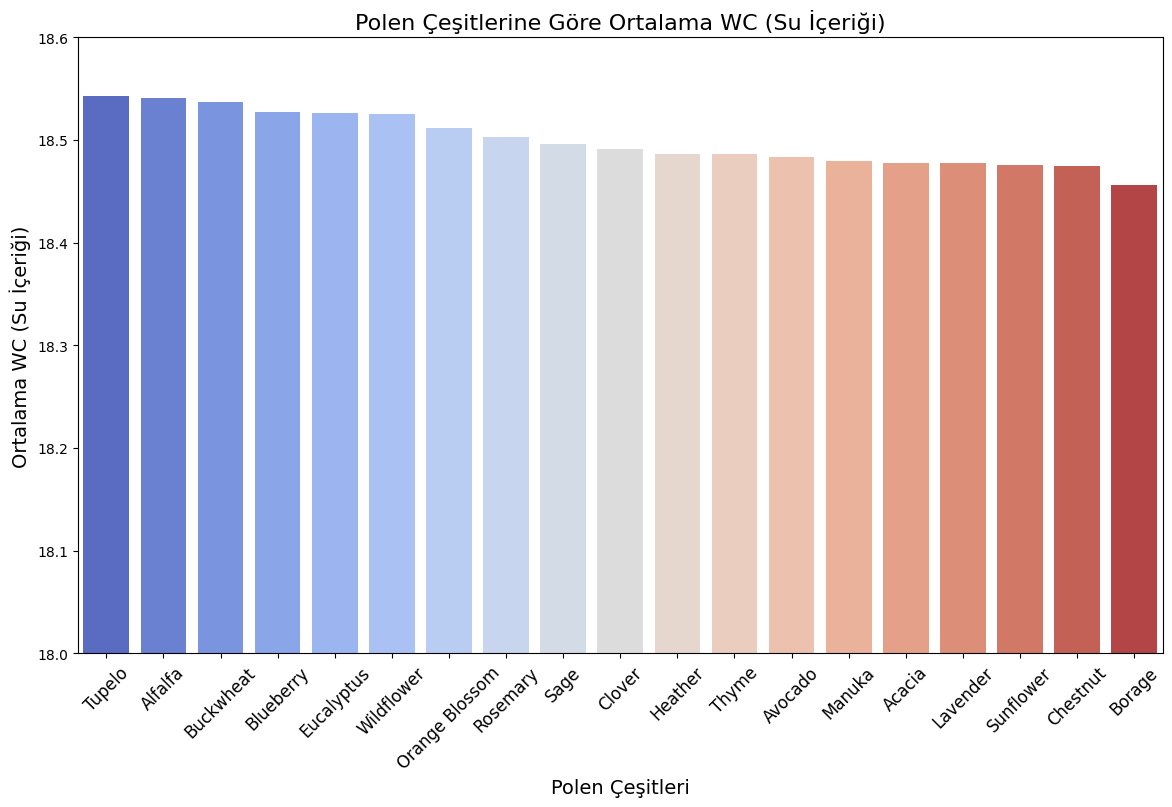

In [90]:
# Polen tÃ¼rlerine gÃ¶re ortalama WC deÄŸerlerini hesaplamak
avg_wc_per_pollen = mean_filled_df.groupby('Pollen_analysis')['WC'].mean().reset_index()

# Polen tÃ¼rlerini WC deÄŸerine gÃ¶re sÄ±ralamak
avg_wc_per_pollen = avg_wc_per_pollen.sort_values(by='WC', ascending=False)


# Bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_wc_per_pollen, x='Pollen_analysis', y='WC', palette='coolwarm')
# Y eksenini 18 ve 18.6 aralÄ±ÄŸÄ±na sÄ±nÄ±rla
plt.ylim(18, 18.6)

# GrafiÄŸin baÅŸlÄ±ÄŸÄ± ve eksen adlarÄ±
plt.title('Polen Ã‡eÅŸitlerine GÃ¶re Ortalama WC (Su Ä°Ã§eriÄŸi)', fontsize=16)
plt.xlabel('Polen Ã‡eÅŸitleri', fontsize=14)
plt.ylabel('Ortalama WC (Su Ä°Ã§eriÄŸi)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# GrafiÄŸi gÃ¶ster
plt.show()

In [91]:
# Polen tÃ¼rlerine gÃ¶re pH ortalamalarÄ±nÄ± hesaplama
mean_ph_by_pollen = data.groupby('Pollen_analysis')['pH'].mean().reset_index()

# Bar grafiÄŸi oluÅŸturma
plt.figure(figsize=(14, 8))
sns.barplot(data=mean_ph_by_pollen, x='Pollen_analysis', y='pH', palette='viridis')
# Y eksenini 4 ve 5.5 aralÄ±ÄŸÄ±na sÄ±nÄ±rla
plt.ylim(4, 5.5)

# Grafik baÅŸlÄ±k ve etiketleri
plt.title('Polen Ã‡eÅŸitlerine GÃ¶re Ortalama pH', fontsize=16)
plt.xlabel('Polen Ã‡eÅŸitleri', fontsize=14)
plt.ylabel('Ortalama pH', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Ortalama deÄŸerlerin Ã§ubuklarÄ±n Ã¼zerine eklenmesi
for i, value in enumerate(mean_ph_by_pollen['pH']):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', fontsize=10)

# GrafiÄŸi gÃ¶sterme
plt.tight_layout()
plt.show()

<ipython-input-91-bf09ba742851>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_ph_by_pollen, x='Pollen_analysis', y='pH', palette='viridis')


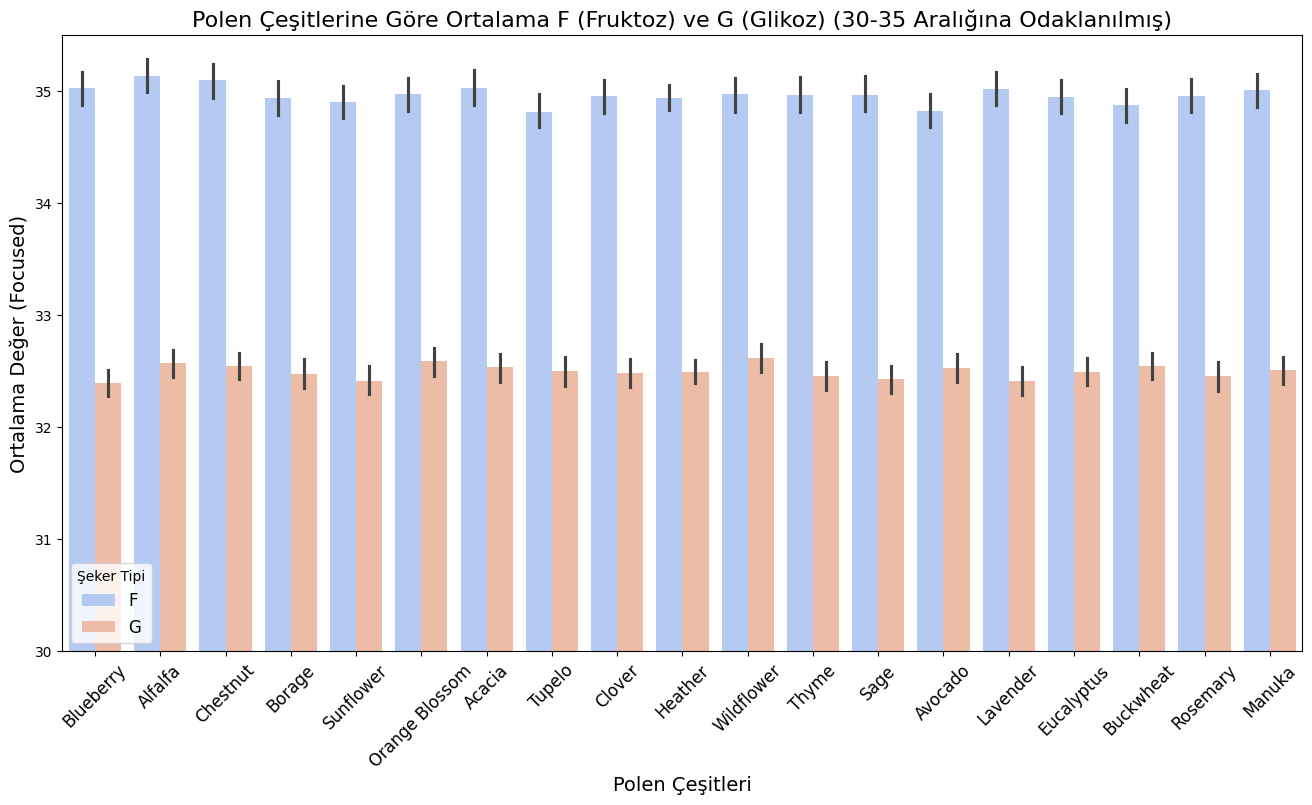

In [92]:
avg_fg_per_pollen_melted = mean_filled_df.melt(
    id_vars='Pollen_analysis',
    value_vars=['F', 'G'],
    var_name='Sugar Type',
    value_name='Value'
)

# Grafik oluÅŸturma
plt.figure(figsize=(16, 8))
sns.barplot(data=avg_fg_per_pollen_melted, x='Pollen_analysis', y='Value', hue='Sugar Type', palette='coolwarm')

# Y eksenini 30-35 aralÄ±ÄŸÄ±na sÄ±nÄ±rla
plt.ylim(30, 35.5)

# GrafiÄŸin baÅŸlÄ±ÄŸÄ± ve eksen adlarÄ±
plt.title('Polen Ã‡eÅŸitlerine GÃ¶re Ortalama F (Fruktoz) ve G (Glikoz) (30-35 AralÄ±ÄŸÄ±na OdaklanÄ±lmÄ±ÅŸ)', fontsize=16)
plt.xlabel('Polen Ã‡eÅŸitleri', fontsize=14)
plt.ylabel('Ortalama DeÄŸer (Focused)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Åžeker Tipi', fontsize=12)

# GrafiÄŸi gÃ¶ster
plt.show()

<ipython-input-93-3ebd529f0fbd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_ec_per_pollen, x='Pollen_analysis', y='EC', palette='viridis')


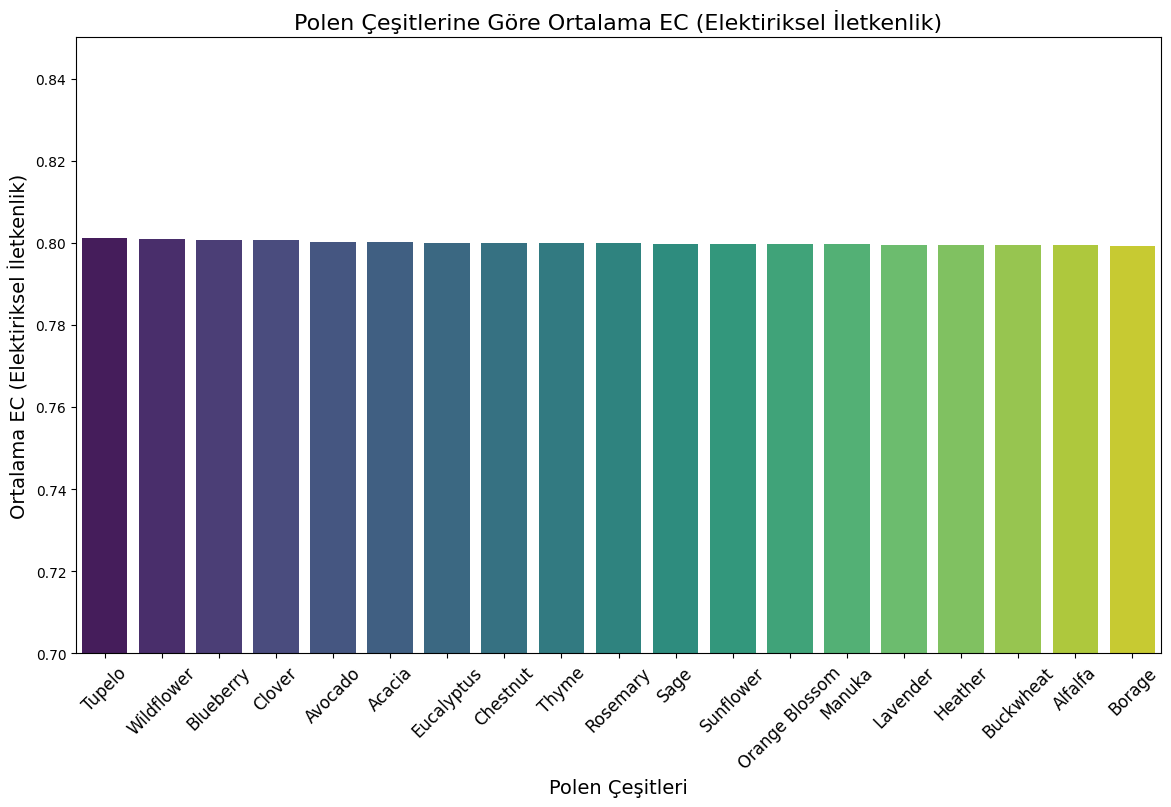

In [93]:
# Polen tÃ¼rlerine gÃ¶re ortalama EC deÄŸerlerini hesapla
avg_ec_per_pollen = mean_filled_df.groupby('Pollen_analysis')['EC'].mean().reset_index()

# Polen tÃ¼rlerini EC deÄŸerine gÃ¶re sÄ±ralama
avg_ec_per_pollen = avg_ec_per_pollen.sort_values(by='EC', ascending=False)

# Bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_ec_per_pollen, x='Pollen_analysis', y='EC', palette='viridis')

# Y eksenini 0.7 ile 0.85 aralÄ±ÄŸÄ±na sÄ±nÄ±rla
plt.ylim(0.7, 0.85)

# GrafiÄŸin baÅŸlÄ±ÄŸÄ± ve eksen adlarÄ±
plt.title('Polen Ã‡eÅŸitlerine GÃ¶re Ortalama EC (Elektiriksel Ä°letkenlik)', fontsize=16)
plt.xlabel('Polen Ã‡eÅŸitleri', fontsize=14)
plt.ylabel('Ortalama EC (Elektiriksel Ä°letkenlik)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# GrafiÄŸi gÃ¶ster
plt.show()

YukarÄ±daki maddeleri iÃ§eren 4 ayrÄ± grafik yukarÄ±da gÃ¶rÃ¼lÃ¼yor. 4 grafikte de deÄŸerler birbirine fazlasÄ±yla yakÄ±ndÄ±r. Birbirlerinden ayrÄ±lan, gÃ¶z Ã¶nÃ¼ne Ã§Ä±kan bir deÄŸer bulunmamakla birlikte Manuka balÄ±nÄ±n Antibiyotiklik etkisini saÄŸlayan deÄŸiÅŸken ya datasetimde yer almÄ±yor ya da datasetinde bulunan herhangi bir bal da en az Manuka balÄ± kadar antibiyotik Ã¶zellik gÃ¶steriyor denilebilir.

In [94]:
# LabelEncoder nesnesi oluÅŸtur
label_encoder = LabelEncoder()

# Kategorik deÄŸiÅŸkenin adÄ±nÄ± seÃ§
categorical_column = 'Pollen_analysis'

# Kategorik veriyi encode et
data[categorical_column + '_encoded'] = label_encoder.fit_transform(data[categorical_column])

# Ä°lk 5 satÄ±rÄ± kontrol et
print(data[[categorical_column, categorical_column + '_encoded']].head())

  Pollen_analysis  Pollen_analysis_encoded
0       Blueberry                        3
1         Alfalfa                        1
2        Chestnut                        6
3       Blueberry                        3
4         Alfalfa                        1


In [95]:
numeric_features = data.select_dtypes(include=np.number).columns
correlation_matrix = data[numeric_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('SayÄ±sal DeÄŸiÅŸkenlerin Korelasyon IsÄ± HaritasÄ±')
plt.show()

* CS (Color Score) ve Purity (0.08): CS ile Purity arasÄ±nda Ã§ok zayÄ±f bir pozitif iliÅŸki vardÄ±r. Bu, daha koyu renkli ballarÄ±n az da olsa daha saf olabileceÄŸini gÃ¶sterebilir.

* Density (YoÄŸunluk) ve Purity (-0.11): Negatif iliÅŸki vardÄ±r. YoÄŸunluk arttÄ±kÃ§a balÄ±n saflÄ±ÄŸÄ± azalma eÄŸilimi gÃ¶sterebilir, ancak iliÅŸki Ã§ok zayÄ±f.

* WC (Water Content - Su Ä°Ã§eriÄŸi) ve Purity (-0.22): WC ile saflÄ±k arasÄ±nda zayÄ±f bir negatif iliÅŸki vardÄ±r. Daha dÃ¼ÅŸÃ¼k su iÃ§eriÄŸi, daha saf bal Ã¶rneklerini iÅŸaret edebilir.

* pH ve Purity (-0.22): ZayÄ±f negatif iliÅŸki. Daha dÃ¼ÅŸÃ¼k pH seviyeleri daha saf ballarÄ± temsil edebilir.


* Viscosity ve Purity (0.42): Viskozite ile saflÄ±k arasÄ±nda orta dÃ¼zeyde pozitif bir iliÅŸki vardÄ±r. Daha yÃ¼ksek viskozite, genelde daha saf bal Ã¶rneklerini ifade eder.

* Price ve Viscosity (0.42): Viskozite ile fiyat arasÄ±nda anlamlÄ± bir iliÅŸki vardÄ±r. YÃ¼ksek viskoziteye sahip ballar, daha yÃ¼ksek fiyatlandÄ±rÄ±labilir.

* Purity ve Price (0.42): Orta dÃ¼zeyde pozitif bir iliÅŸki var. SaflÄ±k arttÄ±kÃ§a balÄ±n fiyatÄ± da artma eÄŸilimindedir.


YÃ¼ksek vizkosite, balÄ±n saflÄ±ÄŸÄ± ve fiyat yÃ¼ksekliÄŸi birbiri ile pozitif iliÅŸkiye sahiptir. ML projesi yapÄ±lÄ±rken bu Ã¼Ã§ sÃ¼tuna dikkat edilmelidir.

##5. Gelecek ML Projelerine Ã–neriler

Bu projenin sonunda datasetime en uygun ML modelinin Regresyon modeli olduÄŸunu dÃ¼ÅŸÃ¼nÃ¼yorum.

* Regresyon modelini seÃ§me nedenlerim;

Bal fiyatÄ± veya saflÄ±k gibi deÄŸerleri tahmin etmem gerekiyor. Ben gelecekte fiyat tahminlemesi yapmanÄ±n daha gÃ¼zel bir sonuÃ§ vereceÄŸini dÃ¼ÅŸÃ¼nÃ¼yorum. Regresyon modeli bu konularda iyi Ã§alÄ±ÅŸan bir model.

* Ã–zellikler arasÄ±ndaki iliÅŸkiler;

Hangi Ã¶zelliÄŸin neyi ne kadar etkilediÄŸini gÃ¶rmek ve Ã¶ÄŸrenmek daha iyi modeller oluÅŸturmamda faydalÄ± olabilir. Mesela Viscosity arttÄ±ÄŸÄ±nda Price nasÄ±l deÄŸiÅŸiyor, regresyon bunu net ÅŸekilde gÃ¶sterebilen bir model. DeÄŸiÅŸkenler arasÄ±ndaki iliÅŸkileri gÃ¶rmek iÃ§in gÃ¼zel bir modeldir.

* Veri setim hakkÄ±nda;

Veri daÄŸÄ±lÄ±mÄ±m, sÄ±nÄ±flar arasÄ± dengem iyi olduÄŸu iÃ§in regresyon modeli Ã§ok daha yÃ¼ksek doÄŸruluk oranÄ±yla Ã§alÄ±ÅŸabilir. Polen Ã§eÅŸitlerinin hepsi ile Ã¶ÄŸrenebilir ve tahminleme yapabilir.


SonuÃ§ olarak, hem veri setime uygunluÄŸu hem de aÃ§Ä±k sonuÃ§lar vermesiyle regresyon modeli bana fazlasÄ±yla uygun gibi gÃ¶rÃ¼nÃ¼yor. ðŸ˜Š